<b><center>PREDICTIVE MODELLING</center></b>

<b><center>1.LINEAR REGRESSION</center></b>

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

<b>1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).</b>

<br>1.Variable Name-Description</br>
<br>2.Carat- Carat weight of the cubic zirconia.</br>
<br>3.Cut- Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.</br>
<br>4.Color - Colour of the cubic zirconia.With D being the worst and J the best.</br>
<br>5.Clarity -Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1</br>
<br>6.Depth- The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.</br>
<br>7.Table- The Width of the cubic zirconia's' Table expressed as a Percentage of its Average Diameter.</br>
<br>8.Price- the Price of the cubic zirconia.</br>
<br>9.X-Length of the cubic zirconia in mm.</br>
<br>10.Y- Width of the cubic zirconia in mm.</br>
<br>11.Z- Height of the cubic zirconia in mm.</br>

<b><center>Price is the target variable here</center></b>

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import skew
%matplotlib inline
from scipy import stats
import statistics
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [532]:
df=pd.read_csv('cubic_zirconia.csv')

In [533]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [534]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [535]:
df.info()
#The data set contains 26967 row, 11 columns .
#In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features where 'price' is the target variable and all other are predector variable.
#The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
#Exept depth, in all the column non null count is 26967.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [536]:
df.shape

(26967, 11)

In [537]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [538]:
df.skew()
#calculating skewness before treating outliers present in the data.

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

In [539]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [540]:
df.isnull().sum()
#we can observe there are 697 missing value in the depth column. 

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [541]:
df.duplicated().sum()

0

In [542]:
df['price'].nunique()

8742

In [543]:
for column in df[['cut', 'clarity', 'color' ]]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64




In [544]:
# drop the serial no column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [545]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<b><center>CONTINUOUS VARIABLES</center></b>

In [211]:
print('Range of values: ', df['carat'].max()-df['carat'].min())
#Central values 
print('Minimum carat: ', df['carat'].min())
print('Maximum carat: ',df['carat'].max())
print('Mean value: ', df['carat'].mean())
print('Mode value: ', df['carat'].mode())
print('Median value: ',df['carat'].median())
print('Standard deviation: ', df['carat'].std())
print('Null values: ',df['carat'].isnull().any())
#Quartiles

Q1=df['carat'].quantile(q=0.25)
Q3=df['carat'].quantile(q=0.75)
print('carat - 1st Quartile (Q1) is: ', Q1)
print('carat - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of carat is ', stats.iqr(df['carat']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in carat: ', L_outliers)
print('Upper outliers in carat: ', U_outliers)

print('Number of outliers in carat upper : ', df[df['carat']>24.8575]['carat'].count())
print('Number of outliers in carat lower : ', df[df['carat']<4.717499]['carat'].count())
print('% of Outlier in carat upper: ',round(df[df['carat']>24.8575]['carat'].count()*100/len(df)), '%')
print('% of Outlier in carat lower: ',round(df[df['carat']<4.717499]['carat'].count()*100/len(df)), '%')

Range of values:  4.3
Minimum carat:  0.2
Maximum carat:  4.5
Mean value:  0.7983754218118336
Mode value:  0    0.3
dtype: float64
Median value:  0.7
Standard deviation:  0.47774547354501284
Null values:  False
carat - 1st Quartile (Q1) is:  0.4
carat - 3st Quartile (Q3) is:  1.05
Interquartile range (IQR) of carat is  0.65
Lower outliers in carat:  -0.5750000000000001
Upper outliers in carat:  2.0250000000000004
Number of outliers in carat upper :  0
Number of outliers in carat lower :  26967
% of Outlier in carat upper:  0 %
% of Outlier in carat lower:  100 %


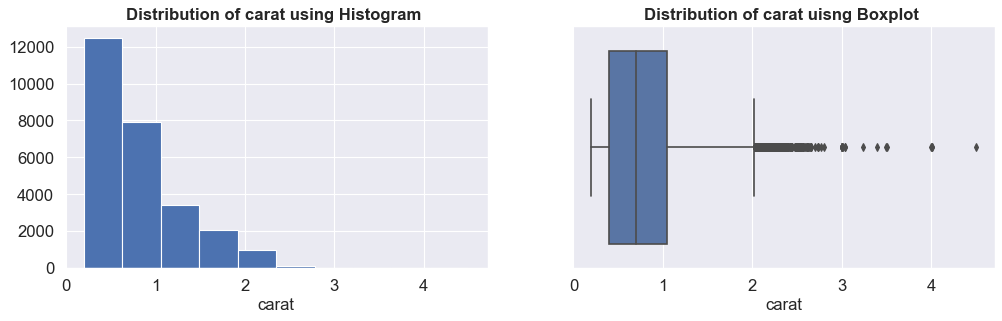

<Figure size 432x288 with 0 Axes>

In [212]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['carat'])
plt.xlabel('carat', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of carat using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='carat',data=df)
plt.xlabel('carat', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of carat uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


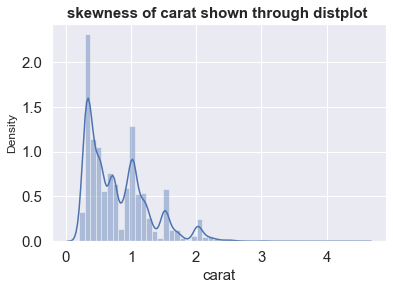

In [213]:
#distplot
sns.distplot(df['carat'])
plt.xlabel('carat', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of carat shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [214]:
print('Range of values: ', df['depth'].max()-df['depth'].min())
#Central values 
print('Minimum depth: ', df['depth'].min())
print('Maximum depth: ',df['depth'].max())
print('Mean value: ', df['depth'].mean())
print('Mode value: ', df['depth'].mode())
print('Median value: ',df['depth'].median())
print('Standard deviation: ', df['depth'].std())
print('Null values: ',df['depth'].isnull().any())

#Quartiles

Q1=df['depth'].quantile(q=0.25)
Q3=df['depth'].quantile(q=0.75)
print('depth - 1st Quartile (Q1) is: ', Q1)
print('depth - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of depth is ', stats.iqr(df['depth']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in depth: ', L_outliers)
print('Upper outliers in depth: ', U_outliers)

print('Number of outliers in depth upper : ', df[df['depth']>19.1125]['depth'].count())
print('Number of outliers in depths lower : ', df[df['depth']<10.052499]['depth'].count())
print('% of Outlier in depth upper: ',round(df[df['depth']>19.1125]['depth'].count()*100/len(df)), '%')
print('% of Outlier in depth lower: ',round(df[df['depth']<10.052499]['depth'].count()*100/len(df)), '%')

Range of values:  22.799999999999997
Minimum depth:  50.8
Maximum depth:  73.6
Mean value:  61.745146555006194
Mode value:  0    62.0
dtype: float64
Median value:  61.8
Standard deviation:  1.4128602381425932
Null values:  True
depth - 1st Quartile (Q1) is:  61.0
depth - 3st Quartile (Q3) is:  62.5
Interquartile range (IQR) of depth is  nan
Lower outliers in depth:  58.75
Upper outliers in depth:  64.75
Number of outliers in depth upper :  26270
Number of outliers in depths lower :  0
% of Outlier in depth upper:  97 %
% of Outlier in depth lower:  0 %


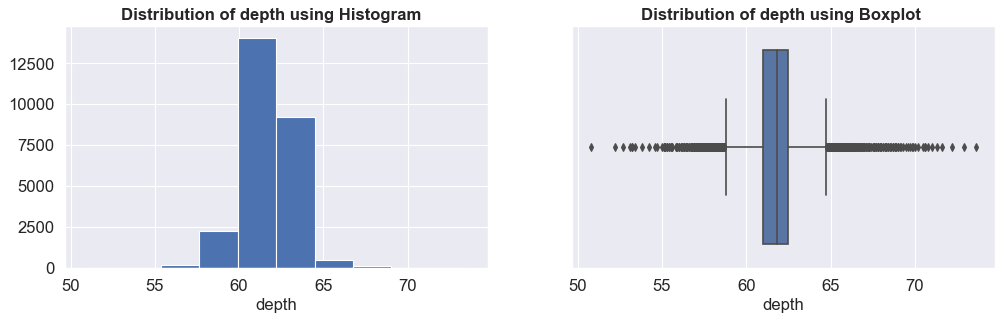

<Figure size 432x288 with 0 Axes>

In [215]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['depth'])
plt.xlabel('depth', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of depth using Histogram  ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='depth',data=df)
plt.xlabel('depth', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of depth using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


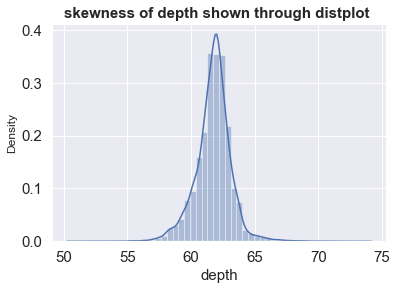

In [216]:
#distplot
sns.distplot(df['depth'])
plt.xlabel('depth', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of depth shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [217]:
print('Range of values: ', df['table'].max()-df['table'].min())
#Central values 
print('Minimum table ', df['table'].min())
print('Maximum table: ',df['table'].max())
print('Mean value: ', df['table'].mean())
print('Mode value: ', df['table'].mode())
print('Median value: ',df['table'].median())
print('Standard deviation: ', df['table'].std())
print('Null values: ',df['table'].isnull().any())

#Quartiles

Q1=df['table'].quantile(q=0.25)
Q3=df['table'].quantile(q=0.75)
print('table - 1st Quartile (Q1) is: ', Q1)
print('table - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of table is ', stats.iqr(df['table']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in table: ', L_outliers)
print('Upper outliers in table: ', U_outliers)
print('Number of outliers in table upper : ', df[df['table']>0.9340875]['table'].count())
print('Number of outliers in table lower : ', df[df['table']<0.8105875]['table'].count())
print('% of Outlier in table upper: ',round(df[df['table']>0.9340875]['table'].count()*100/len(df)), '%')
print('% of Outlier in table lower: ',round(df[df['table']<0.8105875]['table'].count()*100/len(df)), '%')

Range of values:  30.0
Minimum table  49.0
Maximum table:  79.0
Mean value:  57.45607965290908
Mode value:  0    56.0
dtype: float64
Median value:  57.0
Standard deviation:  2.2320679090295075
Null values:  False
table - 1st Quartile (Q1) is:  56.0
table - 3st Quartile (Q3) is:  59.0
Interquartile range (IQR) of table is  3.0
Lower outliers in table:  51.5
Upper outliers in table:  63.5
Number of outliers in table upper :  26967
Number of outliers in table lower :  0
% of Outlier in table upper:  100 %
% of Outlier in table lower:  0 %


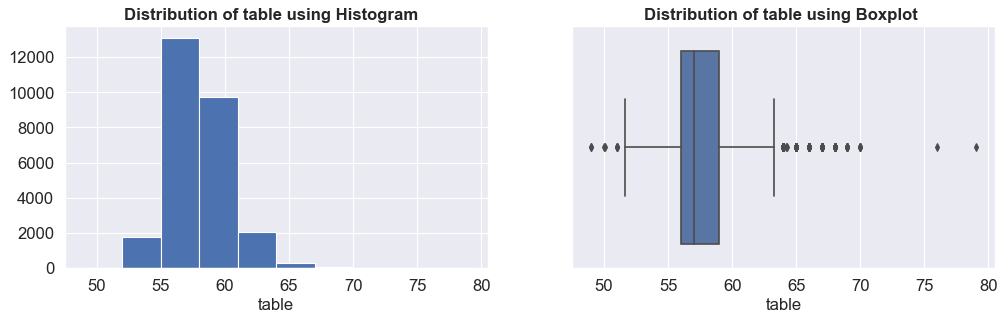

<Figure size 432x288 with 0 Axes>

In [218]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['table'])
plt.xlabel('table', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of table using Histogram  ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='table',data=df)
plt.xlabel('table', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of table using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


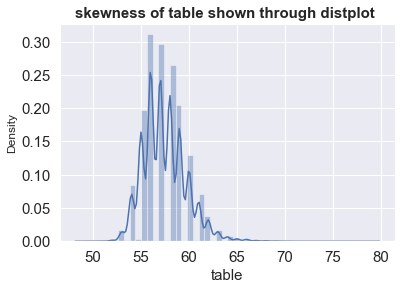

In [219]:
#distplot
sns.distplot(df['table'])
plt.xlabel('table', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of table shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [220]:
print('Range of values: ', df['x'].max()-df['x'].min())
#Central values 
print('Minimum x: ', df['x'].min())
print('Maximum x: ',df['x'].max())
print('Mean value: ', df['x'].mean())
print('Mode value: ', df['x'].mode())
print('Median value: ',df['x'].median())
print('Standard deviation: ', df['x'].std())
print('Null values: ',df['x'].isnull().any())

#Quartiles

Q1=df['x'].quantile(q=0.25)
Q3=df['x'].quantile(q=0.75)
print('x - 1st Quartile (Q1) is: ', Q1)
print('x - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of x is ', stats.iqr(df['x']))

#Outlier detection from Interquartile range (IQR) in data(df)

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in x: ', L_outliers)
print('Upper outliers in x: ', U_outliers)

print('Number of outliers in x upper : ', df[df['x']>7.056000000000001]['x'].count())
print('Number of outliers in x lower : ', df[df['x']<4.186]['x'].count())
print('% of Outlier in x upper: ',round(df[df['x']>7.056000000000001]['x'].count()*100/len(df)), '%')
print('% of Outlier in x lower: ',round(df[df['x']<4.186]['x'].count()*100/len(df)), '%')

Range of values:  10.23
Minimum x:  0.0
Maximum x:  10.23
Mean value:  5.729853524678309
Mode value:  0    4.38
dtype: float64
Median value:  5.69
Standard deviation:  1.1285163776477767
Null values:  False
x - 1st Quartile (Q1) is:  4.71
x - 3st Quartile (Q3) is:  6.55
Interquartile range (IQR) of x is  1.8399999999999999
Lower outliers in x:  1.9500000000000002
Upper outliers in x:  9.309999999999999
Number of outliers in x upper :  3479
Number of outliers in x lower :  654
% of Outlier in x upper:  13 %
% of Outlier in x lower:  2 %


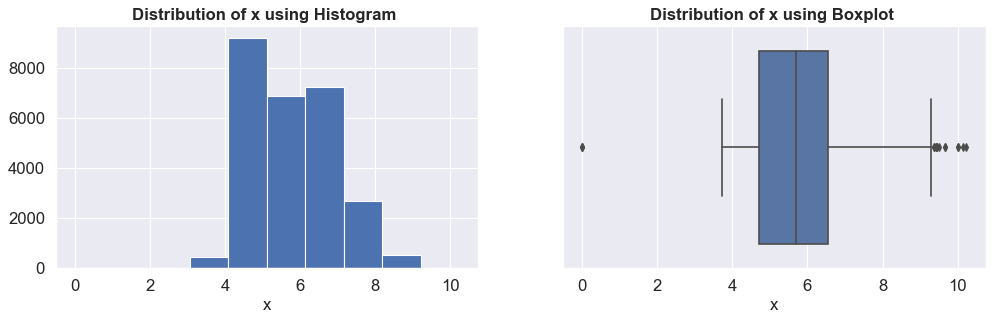

<Figure size 432x288 with 0 Axes>

In [221]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['x'])
plt.xlabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of x using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='x',data=df)
plt.xlabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of x using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


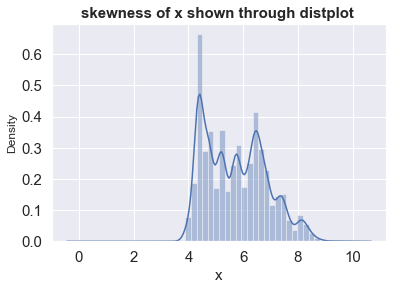

In [222]:
#distplot
sns.distplot(df['x'])
plt.xlabel('x', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of x shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [223]:
print('Range of values: ', df['y'].max()-df['y'].min())
#Central values 
print('Minimum y: ', df['y'].min())
print('Maximum y: ',df['y'].max())
print('Mean value : ', df['y'].mean())
print('Mode value : ', df['y'].mode())
print('Median value : ',df['y'].median())
print('Standard deviation: ', df['y'].std())
print('Null values: ',df['y'].isnull().any())

#Quartiles

Q1=df['y'].quantile(q=0.25)
Q3=df['y'].quantile(q=0.75)
print('y - 1st Quartile (Q1) is: ', Q1)
print('y - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of y is ', stats.iqr(df['y']))

#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in y: ', L_outliers)
print('Upper outliers in y: ', U_outliers)

print('Number of outliers in y upper : ', df[df['y']>4.488375]['y'].count())
print('Number of outliers in y lower : ', df[df['y']<2.017375]['y'].count())
print('% of Outlier in y upper: ',round(df[df['y']>4.488375]['y'].count()*100/len(df)), '%')
print('% of Outlier in y lower: ',round(df[df['y']<2.017375]['y'].count()*100/len(df)), '%')

Range of values:  58.9
Minimum y:  0.0
Maximum y:  58.9
Mean value :  5.733568806318799
Mode value :  0    4.35
dtype: float64
Median value :  5.71
Standard deviation:  1.1660575299260496
Null values:  False
y - 1st Quartile (Q1) is:  4.71
y - 3st Quartile (Q3) is:  6.54
Interquartile range (IQR) of y is  1.83
Lower outliers in y:  1.9649999999999999
Upper outliers in y:  9.285
Number of outliers in y upper :  22089
Number of outliers in y lower :  3
% of Outlier in y upper:  82 %
% of Outlier in y lower:  0 %


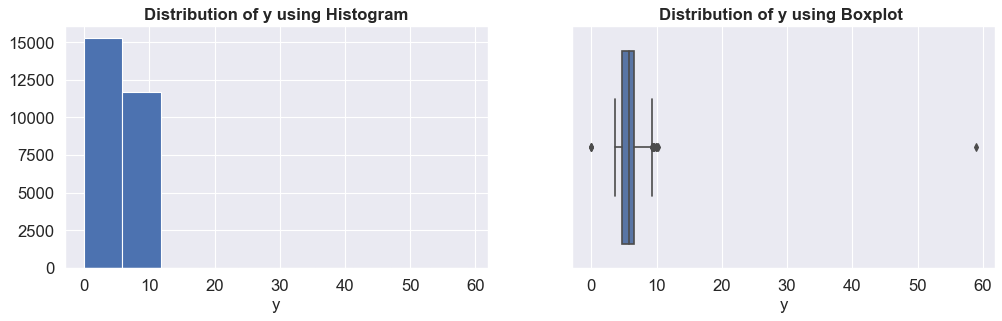

<Figure size 432x288 with 0 Axes>

In [224]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['y'])
plt.xlabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of y using Histogram', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='y',data=df)
plt.xlabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of y using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


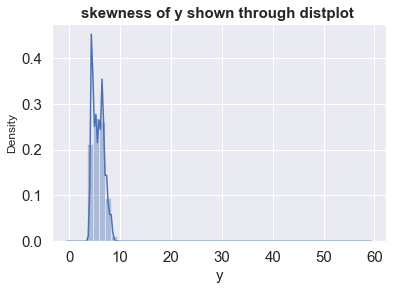

In [225]:
#distplot
sns.distplot(df['y'])
plt.xlabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of y shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [226]:
print('Range of values: ', df['z'].max()-df['z'].min())
#Central values 
print('Minimum z: ', df['z'].min())
print('Maximum z: ',df['z'].max())
print('Mean value: ', df['z'].mean())
print('Mode value: ', df['z'].mode())
print('Median value: ',df['z'].median())
print('Standard deviation: ', df['z'].std())
print('Null values: ',df['z'].isnull().any())

#Quartiles

Q1=df['z'].quantile(q=0.25)
Q3=df['z'].quantile(q=0.75)
print('z - 1st Quartile (Q1) is: ', Q1)
print('z - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of z is ', stats.iqr(df['z']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in z: ', L_outliers)
print('Upper outliers in z: ', U_outliers)

print('Number of outliers in z upper : ', df[df['z']>8.079625]['z'].count())
print('Number of outliers in z lower : ', df[df['z']<-0.749375]['z'].count())
print('% of Outlier in z upper: ',round(df[df['z']>8.079625]['z'].count()*100/len(df)), '%')
print('% of Outlier in z lower: ',round(df[df['z']<-0.749375]['z'].count()*100/len(df)), '%')

Range of values:  31.8
Minimum z:  0.0
Maximum z:  31.8
Mean value:  3.5380572551637184
Mode value:  0    2.69
dtype: float64
Median value:  3.52
Standard deviation:  0.7206236256427411
Null values:  False
z - 1st Quartile (Q1) is:  2.9
z - 3st Quartile (Q3) is:  4.04
Interquartile range (IQR) of z is  1.1400000000000001
Lower outliers in z:  1.1899999999999997
Upper outliers in z:  5.75
Number of outliers in z upper :  1
Number of outliers in z lower :  0
% of Outlier in z upper:  0 %
% of Outlier in z lower:  0 %


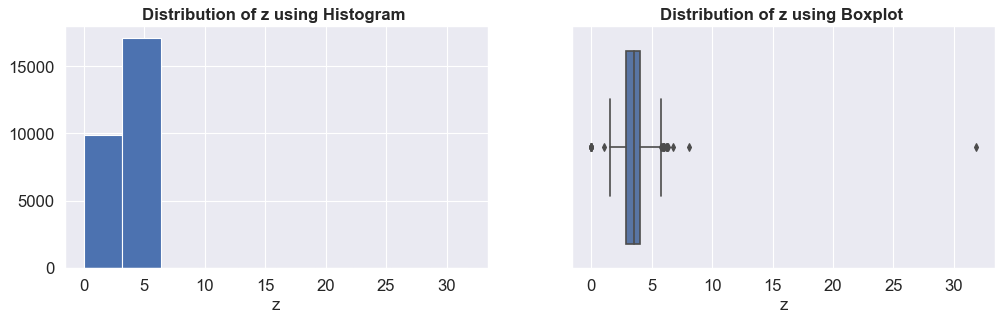

<Figure size 432x288 with 0 Axes>

In [227]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['z'])
plt.xlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of z using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='z',data=df)
plt.xlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of z using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


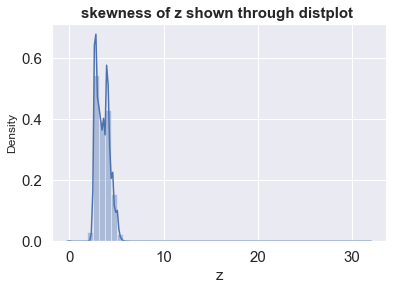

In [228]:
#distplot
sns.distplot(df['z'])
plt.xlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of z shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [229]:
print('Range of values: ', df['price'].max()-df['price'].min())
#Central values 
print('Minimum price: ', df['price'].min())
print('Maximum price: ',df['price'].max())
print('Mean value: ', df['price'].mean())
print('Mode value: ', df['price'].mode())
print('Median value: ',df['price'].median())
print('Standard deviation: ', df['price'].std())
print('Null values: ',df['price'].isnull().any())

#Quartiles

Q1=df['price'].quantile(q=0.25)
Q3=df['price'].quantile(q=0.75)
print('price - 1st Quartile (Q1) is: ', Q1)
print('price - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of price  is', stats.iqr(df['price']))

#Quartiles

Q1=df['price'].quantile(q=0.25)
Q3=df['price'].quantile(q=0.75)
print('price  - 1st Quartile (Q1) is: ', Q1)
print('price  - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of price  is ', stats.iqr(df['price']))

print('Number of outliers in price  upper : ', df[df['price']>7.125000000000002]['price'].count())
print('Number of outliers in price  lower : ', df[df['price']<3.796999999999999]['price'].count())
print('% of Outlier in price  upper: ',round(df[df['price']>7.125000000000002]['price'].count()*100/len(df)), '%')
print('% of Outlier in price  lower: ',round(df[df['price']<3.796999999999999]['price'].count()*100/len(df)), '%')

Range of values:  18492
Minimum price:  326
Maximum price:  18818
Mean value:  3939.5181147328217
Mode value:  0    544
dtype: int64
Median value:  2375.0
Standard deviation:  4024.8646656360347
Null values:  False
price - 1st Quartile (Q1) is:  945.0
price - 3st Quartile (Q3) is:  5360.0
Interquartile range (IQR) of price  is 4415.0
price  - 1st Quartile (Q1) is:  945.0
price  - 3st Quartile (Q3) is:  5360.0
Interquartile range (IQR) of price  is  4415.0
Number of outliers in price  upper :  26967
Number of outliers in price  lower :  0
% of Outlier in price  upper:  100 %
% of Outlier in price  lower:  0 %


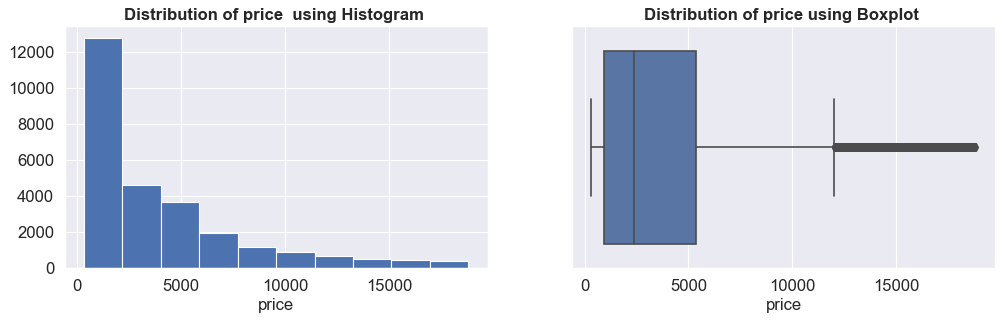

<Figure size 432x288 with 0 Axes>

In [230]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['price'])
plt.xlabel('price', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of price  using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='price',data=df)
plt.xlabel('price', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of price using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


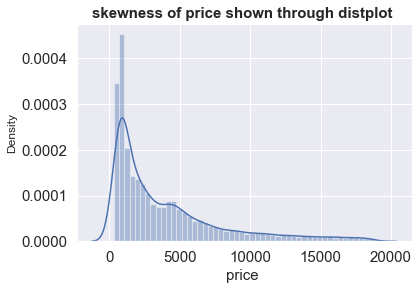

In [231]:
#distplot
sns.distplot(df['price'])
plt.xlabel('price ', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of price shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

<b><center>CATEGORICAL VARIABLES</center></b>

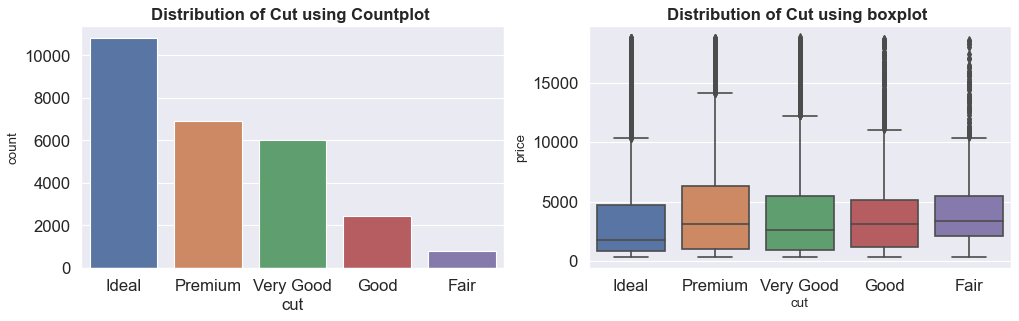

<Figure size 432x288 with 0 Axes>

In [232]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='cut')
plt.xlabel('cut', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Cut using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='cut',y='price',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Cut using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

#The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

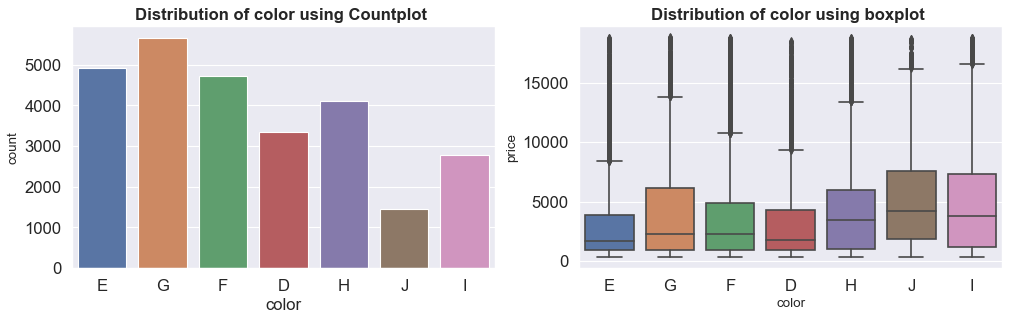

<Figure size 432x288 with 0 Axes>

In [233]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='color')
plt.xlabel('color', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of color using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='color',y='price',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of color using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


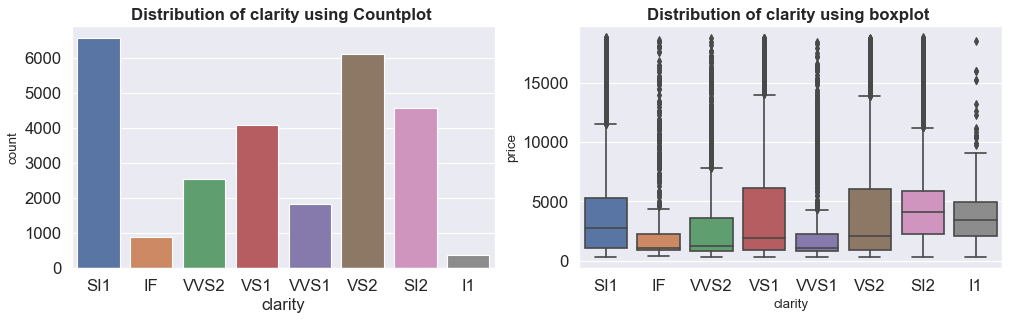

<Figure size 432x288 with 0 Axes>

In [234]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='clarity')
plt.xlabel('clarity', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of clarity using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='clarity',y='price', data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of clarity using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()
#The Diamonds clarity with VS1 & VS2 are the most Expensive.

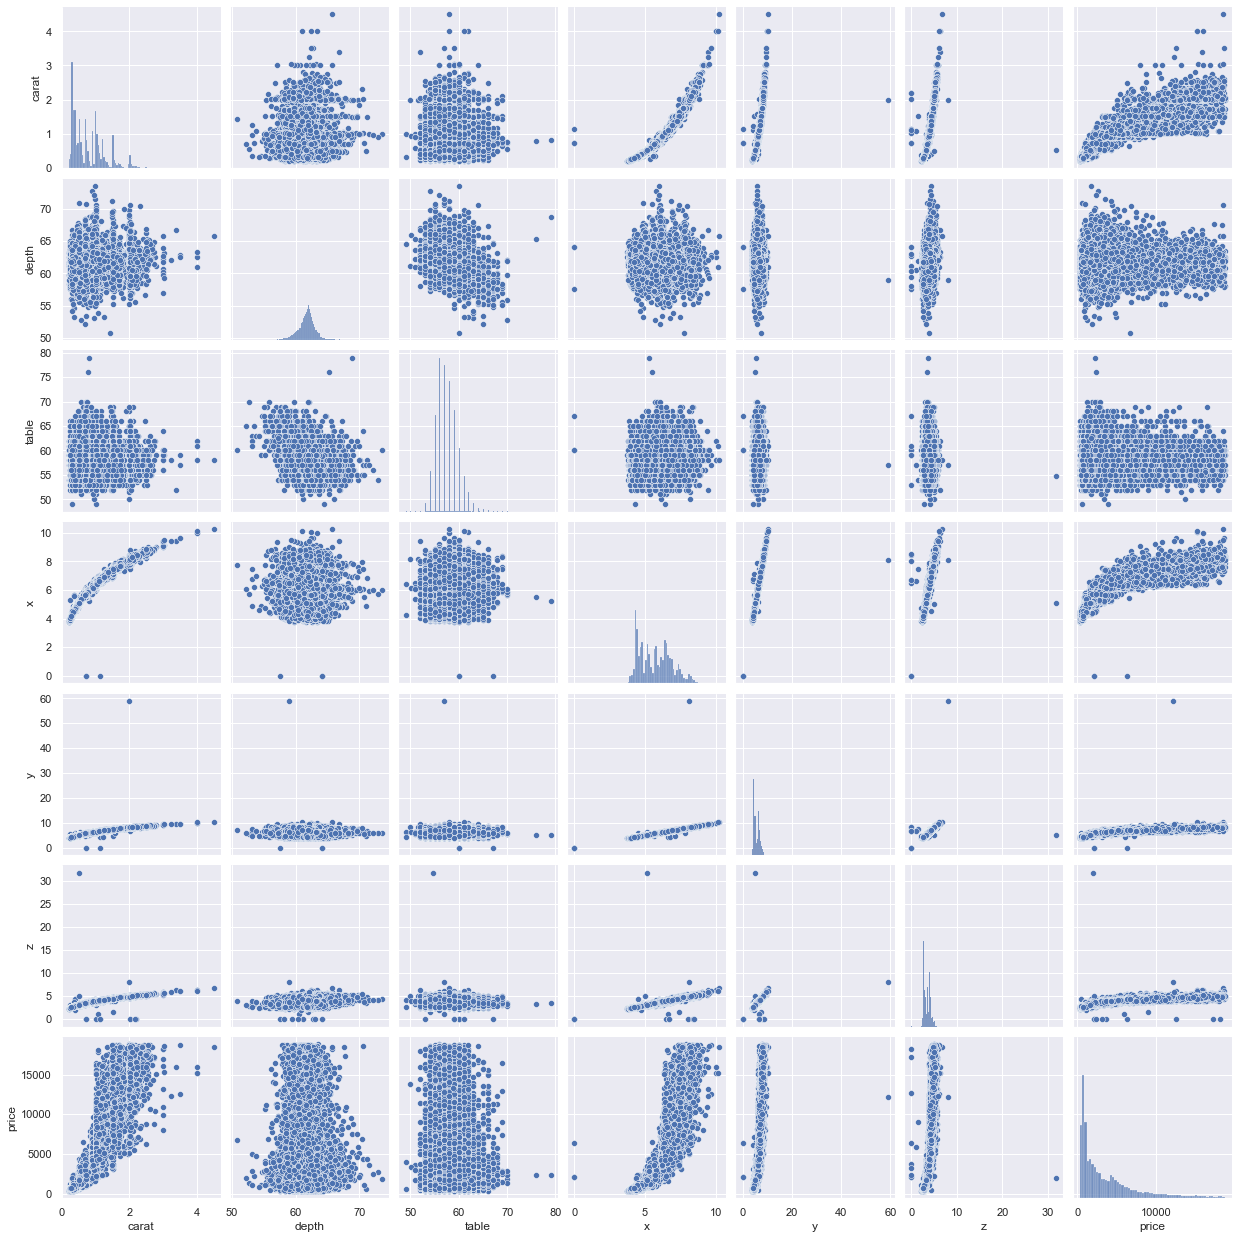

In [235]:
sns.pairplot(df)
plt.show()

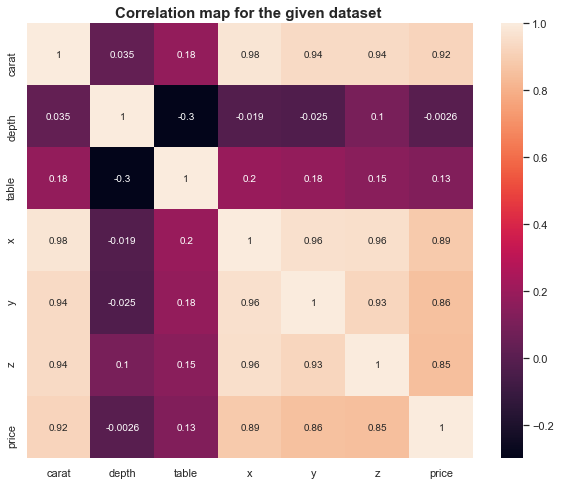

In [236]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation map for the given dataset ', fontsize=15,fontweight='bold')

plt.show()

In [546]:
#How each feature affects the price of diamonds.
correlations = df.corr()
correlations["price"].sort_values(ascending=False)
#It can be inferred that most features correlate with the price of Diamond. 
#The notable exception is "depth" which has a negligible correlation (<1%).

price    1.000000
carat    0.922416
x        0.886247
y        0.856243
z        0.850536
table    0.126942
depth   -0.002569
Name: price, dtype: float64

In [547]:
#Checking for the skewness in the dataset.

df.skew().sort_values(ascending=False)
#There is significant amount of outlier present in some variable. 
#We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

y        3.850189
z        2.568257
price    1.618550
carat    1.116481
table    0.765758
x        0.387986
depth   -0.028618
dtype: float64

<b>1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.</b>

<b>a)check for the values which are equal to zero</b>

In [548]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with carat == 0: {} ".format((df.carat==0).sum()))
print("Number of rows with table == 0: {} ".format((df.table==0).sum()))
print("Number of rows with price == 0: {} ".format((df.price==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with carat == 0: 0 
Number of rows with table == 0: 0 
Number of rows with price == 0: 0 
Number of rows with depth == 0: 0 


In [549]:
df.shape

(26967, 10)

In [550]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

#On the given data set the the mean and median values does not have much difference
#We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. 
#As we know dimensionless or 2-dimensional diamonds are not possible. 
#So we need to filter out those as it clearly faulty data entries. 
#There are three object data type 'cut', 'color' and 'clarity'.

(26958, 10)

<b>b)Impute null values</b>

In [551]:
#checking for null values
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [552]:
df.mean()

carat       0.798190
depth      61.745345
table      57.455342
x           5.730105
y           5.733832
z           3.539238
price    3938.311262
dtype: float64

In [553]:
#Imputing the null values with their mean value
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()     

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

<b>c)combining the sub levels of a ordinal variables</b>

In [554]:
df['cut']=np.where(df['cut'] =='Very Good', 'Good', df['cut'])

In [555]:
df['cut'].unique()
#here we are combining values Good and very good because both has the same meaning and the division between them seemed illogical.

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

<b>1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.</b>

<b><center> Model 1: OUTLIER TREATMENT DONE</center></b>

<b>OUTLIER TREATMENT</b>

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


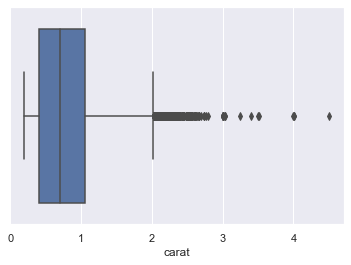

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


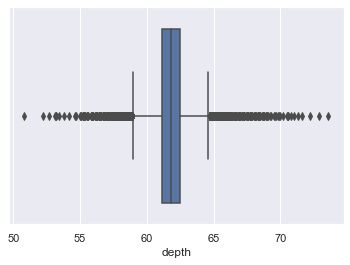

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


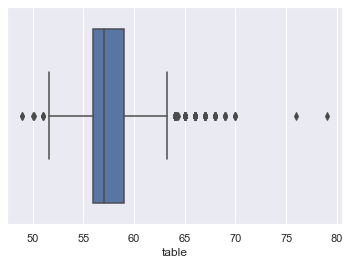

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


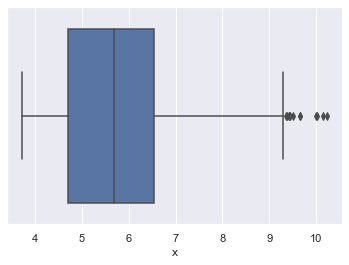

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


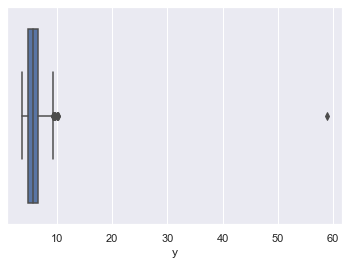

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


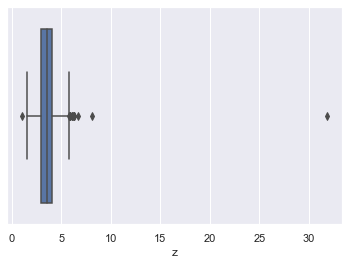

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


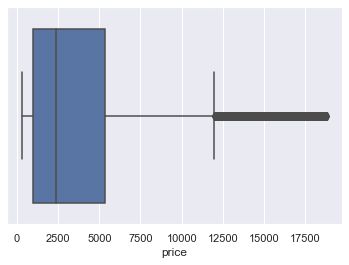

In [556]:
#Checking for outliers

cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [557]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [558]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


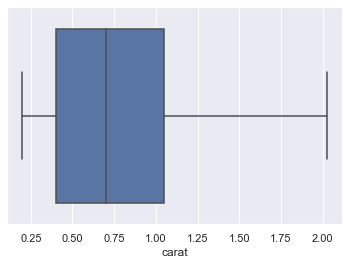

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


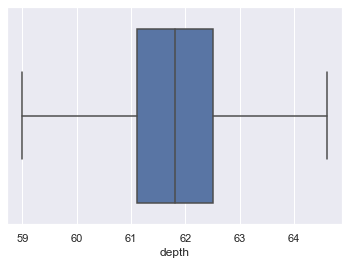

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


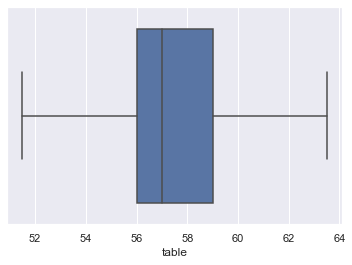

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


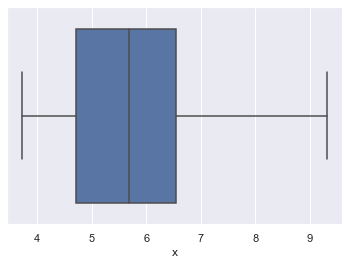

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


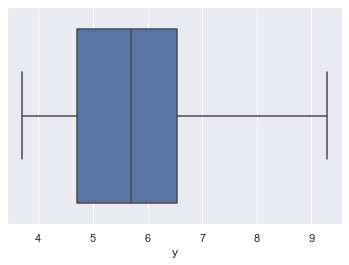

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


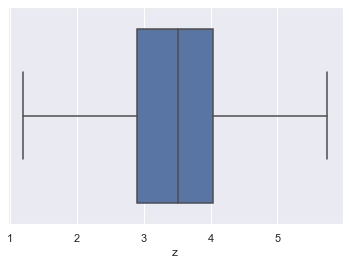

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


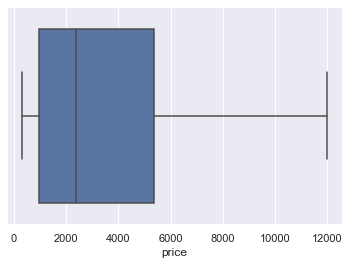

In [559]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

<b>a)Coding the data using Label Encoding</b>

In [447]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [448]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [449]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [450]:
#Converting the object variables into float data types
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [451]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  float64
 2   color    26958 non-null  float64
 3   clarity  26958 non-null  float64
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


<b>b)Splitting the data into train and test</b>

In [243]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop('price', axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [244]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [245]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [246]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [247]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#From the above coefficients for each of the independent attributes we can conclude
#The one unit increase in carat increases price by 8977.829038277792.
#The one unit increase in cut increases price by 69.75897967842616.
#The one unit increase in color increases price by 271.5914417908309.
#The one unit increase in clarity increases price by 434.56246030227766.
#The one unit increase in y increases price by 1470.0512371009538.
#The one unit increase in depth increases price by 30.52888509363773.

#But The one unit increase in table decreases price by -23.570827871227152.
#The one unit increase in x decreases price by -1180.5197852598137.
#The one unit increase in z decreases price by -1157.9476884224716.

The coefficient for carat is 8977.829038277792
The coefficient for cut is 69.75897967842616
The coefficient for color is 271.5914417908309
The coefficient for clarity is 434.56246030227766
The coefficient for depth is 30.528885093637737
The coefficient for table is -23.570827871227152
The coefficient for x is -1180.5197852598137
The coefficient for y is 1470.0512371009538
The coefficient for z is -1157.9476884224716


In [248]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

#The intercept (often labelled the constant) is the expected mean value of Y when all X=0. 
#If X never equals 0, then the intercept has no intrinsic meaning.
#The intercept for our model is -3912.271276442699. 
#In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3912. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3912. which is meaningless.
#We can do Z score or scaling the data and make it nearly zero.

The intercept for our model is -3912.271276442699


In [262]:
print("R SQUARE VALUE FOR LOGISTIC REGRESSION TRAIN DATA IS:",regression_model.score(X_train, y_train))
#93% of the variation in the log_price is explained by the predictors in the model for train set

R SQUARE VALUE FOR LOGISTIC REGRESSION TRAIN DATA IS: 0.9324561752470573


In [263]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

print("R SQUARE VALUE FOR LOGISTIC REGRESSION TEST DATA IS:",regression_model.score(X_test, y_test))


#R-square is the percentage of the response variable variation that is explained by a linear model.
#Or: R-square = Explained variation / Total variation
#R-squared is always between 0 and 100%: 
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.
#In this regression model we can see the R-square value on Training and Test data respectively 0.9324561752470573 and 0. 0.9278045054662835.

R SQUARE VALUE FOR LOGISTIC REGRESSION TEST DATA IS: 0.9278045054662835


In [253]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("RMSE FOR LOGISTIC REGRESSION TRAIN DATA IS:",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

RMSE FOR LOGISTIC REGRESSION TRAIN DATA IS: 897.9583767860294


In [260]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
print("RMSE FOR LOGISTIC REGRESSION TEST DATA IS:",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

RMSE FOR LOGISTIC REGRESSION TEST DATA IS: 941.0889874646965


<b>Linear Regression using Stats model</b>

In [257]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,1.0,3.0,4.0,63.3,59.0,5.52,5.61,3.52,2768.0
8882,0.30,1.0,5.0,3.0,62.9,58.0,4.27,4.31,2.70,544.0
22763,0.70,1.0,2.0,3.0,63.9,59.0,5.64,5.60,3.59,2351.0
6643,0.36,4.0,5.0,3.0,60.2,56.0,4.65,4.62,2.79,1080.0
18701,1.66,1.0,1.0,2.0,63.0,57.0,7.45,7.50,4.71,8901.0


In [258]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3912.271276
carat        8977.829038
cut            69.758980
color         271.591442
clarity       434.562460
depth          30.528885
table         -23.570828
x           -1180.519785
y            1470.051237
z           -1157.947688
dtype: float64

In [259]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.893e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:06:40   Log-Likelihood:            -1.5509e+05
No. Observations:               18870   AIC:                         3.102e+05
Df Residuals:                   18860   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3912.2713    795.710     -4.917      0.0

In [134]:
#Assuming null hypothesis is true, i.e there is no relationship between this variable with price. 
#from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.



#Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero.
#As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'.
#Here all regression co-efficients are not '0'.


#For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. 
#That means this dimension is useless.
#So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [261]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

print("MODEL SCORE OR FOR LOGISTIC REGRESSION USING STATS MODEL IS:",regression_model.score(X_test, y_test))

MODEL SCORE OR FOR LOGISTIC REGRESSION USING STATS MODEL IS: 0.9278045054662835


In [264]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

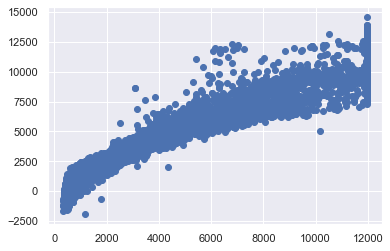

In [265]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [266]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3912.27) * Intercept + (8977.83) * carat + (69.76) * cut + (271.59) * color + (434.56) * clarity + (30.53) * depth + (-23.57) * table + (-1180.52) * x + (1470.05) * y + (-1157.95) * z + 

In [139]:
#Observation:
#we can see that the is a linear plot, very strong corelation between the predicted y and actual y. 
#But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

#Linear regression Performance Metrics:

#intercept for the model: -3912.271276442699
#R square on training data: 0.9324561752470573
#R square on testing data: 0.9278045054662835
#RMSE on Training data: 897.9583767860294
#RMSE on Testing data: 941.0889874646965
#As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

<b>Scaling the data using z-score technique</b>

In [141]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [142]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [143]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [144]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1945813374047847
The coefficient for cut is 0.027300083590137865
The coefficient for color is 0.13389876631467407
The coefficient for clarity is 0.20700307994725606
The coefficient for depth is 0.010725820819393097
The coefficient for table is -0.014647408136903026
The coefficient for x is -0.38321330129521725
The coefficient for y is 0.47382376454964414
The coefficient for z is -0.23242392285632651


In [145]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4.859248497711903e-17


In [146]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)


#Now we can observe by applying z score the intercept became -5.87961525130473e-16.
#Earlier it was -3171.950447307667. 
#the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

0.9279020907051636

In [147]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [148]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2685105385172739

In [149]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

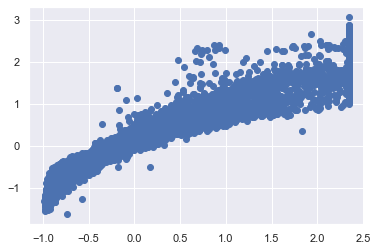

In [150]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

<b>Checking multi-collinearity using VIF</b>

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [153]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

#We can observe there are very strong multi collinearity present in the data set. 
#Ideally it should be within 1 to 5.

carat ---> 122.73655807263573
cut ---> 6.298801234840306
color ---> 5.5426211259202995
clarity ---> 5.4399846795069875
depth ---> 1175.646212614228
table ---> 850.7867343463053
x ---> 10955.234476498012
y ---> 9429.39583195863
z ---> 3212.4911163304073


<b><center>MODEL 2:WITHOUT OUTLIER TREATMENT </center></b>

<b>a)Coding the data using Label Encoding</b>

In [261]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [262]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [263]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [264]:
#Converting the object variables into float data types
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [265]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,1.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  float64
 2   color    26958 non-null  float64
 3   clarity  26958 non-null  float64
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [296]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop('price', axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [297]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [298]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [299]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [300]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#From the above coefficients for each of the independent attributes we can conclude
#The one unit increase in carat increases price by 8901.941.
#The one unit increase in cut increases price by 109.188.
#The one unit increase in color increases price by 272.921.
#The one unit increase in clarity increases price by 436.441.
#The one unit increase in y increases price by 1464.827.
#The one unit increase in depth increases price by 8.236,

#But The one unit increase in table decreases price by -17.345,
#The one unit increase in x decreases price by -1417.908,
#The one unit increase in z decreases price by -711.225.

The coefficient for carat is 10986.718668549902
The coefficient for cut is 67.13419019616663
The coefficient for color is 321.73704577898343
The coefficient for clarity is 495.6513447371202
The coefficient for depth is -100.94104941299908
The coefficient for table is -40.619875894417575
The coefficient for x is -939.7425316260739
The coefficient for y is 9.881331133637524
The coefficient for z is -51.14076664453282


In [301]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

#The intercept (often labelled the constant) is the expected mean value of Y when all X=0. 
#If X never equals 0, then the intercept has no intrinsic meaning.
#The intercept for our model is -3171.950447307667. 
#In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless.
#We can do Z score or scaling the data and make it nearly zero.

The intercept for our model is 6460.03207846911


In [302]:
regression_model.score(X_train, y_train)
#91% of the variation in the log_price is explained by the predictors in the model for train set

0.9103194289214325

In [303]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)


#R-square is the percentage of the response variable variation that is explained by a linear model.
#Or: R-square = Explained variation / Total variation
#R-squared is always between 0 and 100%: 
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.
#In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

0.9031230101094547

In [304]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1193.6772407925894

In [305]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1278.7664440622432

<b>Linear Regression using Stats model</b>

In [306]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
7598,0.71,1.0,3.0,4.0,63.3,59.0,5.52,5.61,3.52,2768
8882,0.30,1.0,5.0,3.0,62.9,58.0,4.27,4.31,2.70,544
22763,0.70,1.0,2.0,3.0,63.9,59.0,5.64,5.60,3.59,2351
6643,0.36,4.0,5.0,3.0,60.2,56.0,4.65,4.62,2.79,1080
18701,1.66,1.0,1.0,2.0,63.0,57.0,7.45,7.50,4.71,8901


In [307]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept     6460.032078
carat        10986.718669
cut             67.134190
color          321.737046
clarity        495.651345
depth         -100.941049
table          -40.619876
x             -939.742532
y                9.881331
z              -51.140767
dtype: float64

In [308]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 2.127e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:16:35   Log-Likelihood:            -1.6047e+05
No. Observations:               18870   AIC:                         3.210e+05
Df Residuals:                   18860   BIC:                         3.210e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6460.0321    681.684      9.477      0.0

In [280]:
#Assuming null hypothesis is true, i.e there is no relationship between this variable with price. 
#from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.



#Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero.
#As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'.
#Here all regression co-efficients are not '0'.


#For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. 
#That means this dimension is useless.
#So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [281]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9031230101094547

In [282]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

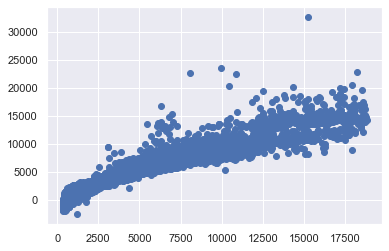

In [283]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [309]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(6460.03) * Intercept + (10986.72) * carat + (67.13) * cut + (321.74) * color + (495.65) * clarity + (-100.94) * depth + (-40.62) * table + (-939.74) * x + (9.88) * y + (-51.14) * z + 

In [310]:
#Observation:
#we can see that the is a linear plot, very strong corelation between the predicted y and actual y. 
#But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

#Linear regression Performance Metrics:

#intercept for the model: -3171.950447307667
#R square on training data: 0.9311935886926559
#R square on testing data: 0.931543712584074
#RMSE on Training data: 907.1312415459143
#RMSE on Testing data: 911.8447345328436
#As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

<b>Checking multi-collinearity using VIF</b>

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [313]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

#We can observe there are very strong multi collinearity present in the data set. 
#Ideally it should be within 1 to 5.

carat ---> 81.40552950953823
cut ---> 5.564525583168275
color ---> 5.537665554546027
clarity ---> 5.280293097359052
depth ---> 547.7010416715381
table ---> 544.04693472376
x ---> 1128.6324665536727
y ---> 348.264868818615
z ---> 385.76211269717913


<b><center>Model 3:WITH SCALING AND WITH OUTLIER TREATMENT</center></b>

<b>Scaling the data using Standard scaler</b>

In [560]:
#perform scaling before outlier treatment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

<b>Using Label Encoding</b>

In [561]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [562]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [563]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [564]:
#Converting the object variables into float data types
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [565]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067306,4.0,5.0,2.0,0.287891,0.261941,-1.296438,-1.289580,-1.261448,-0.933219
1,-1.002414,3.0,3.0,7.0,-0.778967,0.261941,-1.163237,-1.137532,-1.203982,-0.793428
2,0.230546,1.0,5.0,5.0,0.369957,1.189304,0.275339,0.347170,0.347606,0.735631
3,-0.807736,4.0,4.0,4.0,-0.122439,-0.665422,-0.808033,-0.833436,-0.830451,-0.765181
4,-1.045675,4.0,4.0,6.0,-1.107231,0.725622,-1.225398,-1.164364,-1.275814,-0.852515


In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  float64
 2   color    26958 non-null  float64
 3   clarity  26958 non-null  float64
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


<b>b)Splitting the data into train and test</b>

In [567]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop('price', axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [568]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [569]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [570]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [571]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#From the above coefficients for each of the independent attributes we can conclude
#The one unit increase in carat increases price by 8901.941.
#The one unit increase in cut increases price by 109.188.
#The one unit increase in color increases price by 272.921.
#The one unit increase in clarity increases price by 436.441.
#The one unit increase in y increases price by 1464.827.
#The one unit increase in depth increases price by 8.236,

#But The one unit increase in table decreases price by -17.345,
#The one unit increase in x decreases price by -1417.908,
#The one unit increase in z decreases price by -711.225.

The coefficient for carat is 1.1962889482050383
The coefficient for cut is 0.020106617194856024
The coefficient for color is 0.07828074863853217
The coefficient for clarity is 0.12525385372365222
The coefficient for depth is 0.010722266310708658
The coefficient for table is -0.014651905175882792
The coefficient for x is -0.38317250785051576
The coefficient for y is 0.4737400782932322
The coefficient for z is -0.23231389165258473


In [572]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

#The intercept (often labelled the constant) is the expected mean value of Y when all X=0. 
#If X never equals 0, then the intercept has no intrinsic meaning.
#The intercept for our model is -3171.950447307667. 
#In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless.
#We can do Z score or scaling the data and make it nearly zero.

The intercept for our model is -0.7002823223227412


In [573]:
regression_model.score(X_train, y_train)
#91% of the variation in the log_price is explained by the predictors in the model for train set

0.9324561752470573

In [574]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)


#R-square is the percentage of the response variable variation that is explained by a linear model.
#Or: R-square = Explained variation / Total variation
#R-squared is always between 0 and 100%: 
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.
#In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

0.9278045054662835

In [575]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.2588183689351606

In [576]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.27124989649324704

<b>Linear Regression using Stats model</b>

In [577]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
7598,-0.180440,1.0,3.0,4.0,1.272683,0.725622,-0.186426,-0.108973,-0.025924,-0.279226
8882,-1.067306,1.0,5.0,3.0,0.944419,0.261941,-1.296438,-1.271692,-1.203982,-0.920249
22763,-0.202071,1.0,2.0,3.0,1.765079,0.725622,-0.079865,-0.117917,0.074642,-0.399418
6643,-0.937521,4.0,5.0,3.0,-1.271363,-0.665422,-0.958995,-0.994428,-1.074683,-0.765758
18701,1.874493,1.0,1.0,2.0,1.026485,-0.201740,1.527433,1.581441,1.683696,1.488488


In [578]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -0.700282
carat        1.196289
cut          0.020107
color        0.078281
clarity      0.125254
depth        0.010722
table       -0.014652
x           -0.383173
y            0.473740
z           -0.232314
dtype: float64

In [579]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.893e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:59:37   Log-Likelihood:                -1270.1
No. Observations:               18870   AIC:                             2560.
Df Residuals:                   18860   BIC:                             2639.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7003      0.007    -93.684      0.0

In [580]:
#Assuming null hypothesis is true, i.e there is no relationship between this variable with price. 
#from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.



#Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero.
#As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'.
#Here all regression co-efficients are not '0'.


#For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. 
#That means this dimension is useless.
#So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [581]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9278045054662835

In [582]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

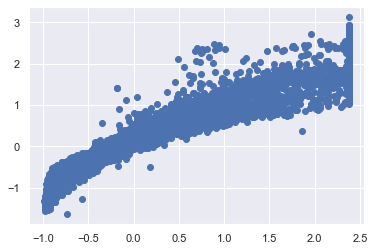

In [583]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [584]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.7) * Intercept + (1.2) * carat + (0.02) * cut + (0.08) * color + (0.13) * clarity + (0.01) * depth + (-0.01) * table + (-0.38) * x + (0.47) * y + (-0.23) * z + 

In [585]:
#Observation:
#we can see that the is a linear plot, very strong corelation between the predicted y and actual y. 
#But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

#Linear regression Performance Metrics:

#intercept for the model: -3171.950447307667
#R square on training data: 0.9311935886926559
#R square on testing data: 0.931543712584074
#RMSE on Training data: 907.1312415459143
#RMSE on Testing data: 911.8447345328436
#As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

<b>Checking multi-collinearity using VIF</b>

In [586]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [587]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [588]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

#We can observe there are very strong multi collinearity present in the data set. 
#Ideally it should be within 1 to 5.

carat ---> 32.881108444254835
cut ---> 4.813633336940842
color ---> 3.538512632084274
clarity ---> 3.8596815853550566
depth ---> 4.314405035699721
table ---> 1.377194956524743
x ---> 424.79956029585077
y ---> 405.5935497064031
z ---> 235.13570075628354


<b><center>MODEL 4:DROPPING THE DEPTH VARIABLE,OUTLIER TREATMENT DONE</center></b>

In [452]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,1.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  float64
 2   color    26958 non-null  float64
 3   clarity  26958 non-null  float64
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [454]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
X = df.drop(['price','depth'], axis=1)


# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [455]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [456]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [457]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [458]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
#From the above coefficients for each of the independent attributes we can conclude
#The one unit increase in carat increases price by 8901.941.
#The one unit increase in cut increases price by 109.188.
#The one unit increase in color increases price by 272.921.
#The one unit increase in clarity increases price by 436.441.
#The one unit increase in y increases price by 1464.827.
#The one unit increase in depth increases price by 8.236,

#But The one unit increase in table decreases price by -17.345,
#The one unit increase in x decreases price by -1417.908,
#The one unit increase in z decreases price by -711.225.

The coefficient for carat is 8992.562189975983
The coefficient for cut is 66.68221067425641
The coefficient for color is 271.2517895047484
The coefficient for clarity is 434.0751244599867
The coefficient for table is -25.73858471034706
The coefficient for x is -1260.0403731872132
The coefficient for y is 1343.078455611944
The coefficient for z is -833.3789797152953


In [459]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

#The intercept (often labelled the constant) is the expected mean value of Y when all X=0. 
#If X never equals 0, then the intercept has no intrinsic meaning.
#The intercept for our model is -3171.950447307667. 
#In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless.
#We can do Z score or scaling the data and make it nearly zero.

The intercept for our model is -1868.2906589917034


In [460]:
regression_model.score(X_train, y_train)
#91% of the variation in the log_price is explained by the predictors in the model for train set

0.9324297883021541

In [461]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)


#R-square is the percentage of the response variable variation that is explained by a linear model.
#Or: R-square = Explained variation / Total variation
#R-squared is always between 0 and 100%: 
#0% indicates that the model explains none of the variability of the response data around its mean.
#100% indicates that the model explains all the variability of the response data around its mean.
#In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

0.9277460807730816

In [462]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

898.1337596919922

In [463]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

941.469701776677

<b>Linear Regression using stats model</b>

In [464]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,table,x,y,z,price
7598,0.71,1.0,3.0,4.0,59.0,5.52,5.61,3.52,2768.0
8882,0.30,1.0,5.0,3.0,58.0,4.27,4.31,2.70,544.0
22763,0.70,1.0,2.0,3.0,59.0,5.64,5.60,3.59,2351.0
6643,0.36,4.0,5.0,3.0,56.0,4.65,4.62,2.79,1080.0
18701,1.66,1.0,1.0,2.0,57.0,7.45,7.50,4.71,8901.0


In [465]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -1868.290659
carat        8992.562190
cut            66.682211
color         271.251790
clarity       434.075124
table         -25.738585
x           -1260.040373
y            1343.078456
z            -833.378980
dtype: float64

In [466]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.253e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:52:34   Log-Likelihood:            -1.5510e+05
No. Observations:               18870   AIC:                         3.102e+05
Df Residuals:                   18861   BIC:                         3.103e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1868.2907    257.185     -7.264      0.0

In [467]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.9277460807730816

In [468]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

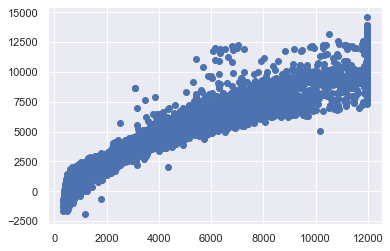

In [469]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['price'], y_pred)

In [470]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1868.29) * Intercept + (8992.56) * carat + (66.68) * cut + (271.25) * color + (434.08) * clarity + (-25.74) * table + (-1260.04) * x + (1343.08) * y + (-833.38) * z + 

<b>Checking multi collinearity using VIF</b>

In [471]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [472]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [473]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

#We can observe there are very strong multi collinearity present in the data set. 
#Ideally it should be within 1 to 5.

carat ---> 95.61943437364137
cut ---> 5.476670834828899
color ---> 5.533927966206135
clarity ---> 5.273609682575016
table ---> 283.4995664731193
x ---> 10476.51633362945
y ---> 9405.063568188005
z ---> 1549.4716029723131


<b><br>1.4 Inference: Basis on these predictions, what are the business insights and recommendations.</br>
<br>Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.</br></b>

<b><br>Conclusion</br></b>
<br>The final Linear Regression equation is</br>

log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True

log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True

When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.

There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

<b><center>LOGISTIC REGRESSION AND LDA</center></b>

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

<br>1.Variable Name-Description</br>
<br>2.Holiday_Package - Opted for Holiday Package yes/no?</br>
<br>3.Salary - Employee salary</br>
<br>4.age - Age in years</br>
<br>5.edu -Years of formal education</br>
<br>6.no_young_children - The number of young children (younger than 7 years)</br>
<br>7.no_older_children - Number of older children</br>
<br>8.foreign - foreigner Yes/No</br>

<b>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.</b>

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn import metrics,model_selection

In [165]:
df2 = pd.read_csv("Holiday_Package.csv")

In [166]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [167]:
for column in df2[['Holliday_Package', 'foreign']]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')


HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [168]:
df2['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [169]:
df2['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [170]:
df2['educ'].value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
1       1
18      1
21      1
Name: educ, dtype: int64

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [172]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [173]:
df2.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [174]:
df2.shape

(872, 8)

In [175]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df2.duplicated().sum()

0

<b><center>CONTINUOUS COLUMNS</center></b>

In [147]:
print('Range of values: ', df2['Salary'].max()-df2['Salary'].min())

#Central values 
print('Minimum Salary: ', df2['Salary'].min())
print('Maximum Salary: ',df2['Salary'].max())
print('Mean value: ', df2['Salary'].mean())
print('Mode value: ', df2['Salary'].mode())
print('Median value: ',df2['Salary'].median())
print('Standard deviation: ', df2['Salary'].std())
print('Null values: ',df2['Salary'].isnull().any())

#Quartiles

Q1=df2['Salary'].quantile(q=0.25)
Q3=df2['Salary'].quantile(q=0.75)
print('Salary - 1st Quartile (Q1) is: ', Q1)
print('Salary - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Salary is ', stats.iqr(df2['Salary']))

#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Salary: ', L_outliers)
print('Upper outliers in Salary: ', U_outliers)
print('Number of outliers in Salary upper : ', df2[df2['Salary']>57.0]['Salary'].count())
print('Number of outliers in Salary lower : ', df2[df2['Salary']<17.0]['Salary'].count())
print('% of Outlier in Salary upper: ',round(df2[df2['Salary']>57.0]['Salary'].count()*100/len(df2)), '%')
print('% of Outlier in Salary lower: ',round(df2[df2['Salary']<17.0]['Salary'].count()*100/len(df2)), '%')

Range of values:  235639
Minimum Salary:  1322
Maximum Salary:  236961
Mean value:  47729.172018348625
Mode value:  0    32197
1    33357
2    35341
3    36976
4    39460
5    40270
6    44280
7    46195
dtype: int64
Median value:  41903.5
Standard deviation:  23418.66853107387
Null values:  False
Salary - 1st Quartile (Q1) is:  35324.0
Salary - 3st Quartile (Q3) is:  53469.5
Interquartile range (IQR) of Salary is  18145.5
Lower outliers in Salary:  8105.75
Upper outliers in Salary:  80687.75
Number of outliers in Salary upper :  872
Number of outliers in Salary lower :  0
% of Outlier in Salary upper:  100 %
% of Outlier in Salary lower:  0 %


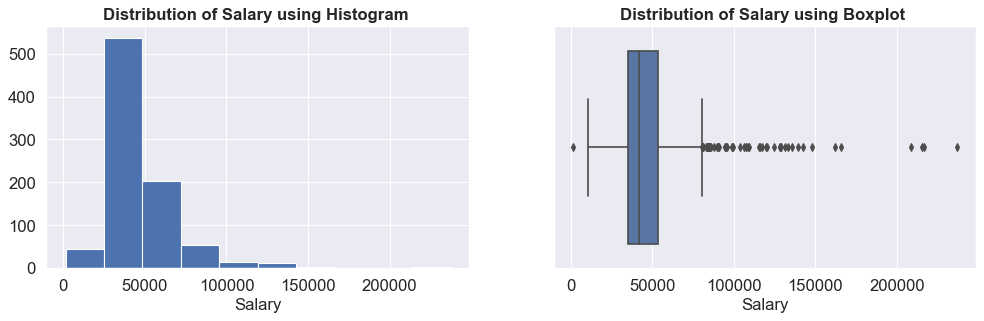

<Figure size 432x288 with 0 Axes>

In [148]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['Salary'])
plt.xlabel('Salary', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Salary using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Salary',data=df2)
plt.xlabel('Salary', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Salary using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


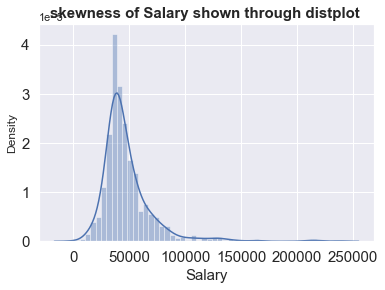

In [149]:
#distplot
sns.distplot(df2['Salary'])
plt.xlabel('Salary', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of Salary shown through distplot ', fontsize=15,fontweight='bold')
plt.show()


In [150]:
print('Range of values: ', df2['age'].max()-df2['age'].min())
#Central values 
print('Minimum age: ', df2['age'].min())
print('Maximum age: ',df2['age'].max())
print('Mean value: ', df2['age'].mean())
print('Mode value: ', df2['age'].mode())
print('Median value: ',df2['age'].median())
print('Standard deviation: ', df2['age'].std())
print('Null values: ',df2['age'].isnull().any())
#Quartiles

Q1=df2['age'].quantile(q=0.25)
Q3=df2['age'].quantile(q=0.75)
print('age - 1st Quartile (Q1) is: ', Q1)
print('age - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of age is ', stats.iqr(df2['age']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)
print('Number of outliers in age upper : ', df2[df2['age']>43.0875]['age'].count())
print('Number of outliers in age lower : ', df2[df2['age']<-25.8525]['age'].count())
print('% of Outlier in age upper: ',round(df2[df2['age']>43.0875]['age'].count()*100/len(df2)), '%')
print('% of Outlier in age lower: ',round(df2[df2['age']<-25.8525]['age'].count()*100/len(df2)), '%')

Range of values:  42
Minimum age:  20
Maximum age:  62
Mean value:  39.955275229357795
Mode value:  0    44
dtype: int64
Median value:  39.0
Standard deviation:  10.551674590487607
Null values:  False
age - 1st Quartile (Q1) is:  32.0
age - 3st Quartile (Q3) is:  48.0
Interquartile range (IQR) of age is  16.0
Lower outliers in age:  8.0
Upper outliers in age:  72.0
Number of outliers in age upper :  335
Number of outliers in age lower :  0
% of Outlier in age upper:  38 %
% of Outlier in age lower:  0 %


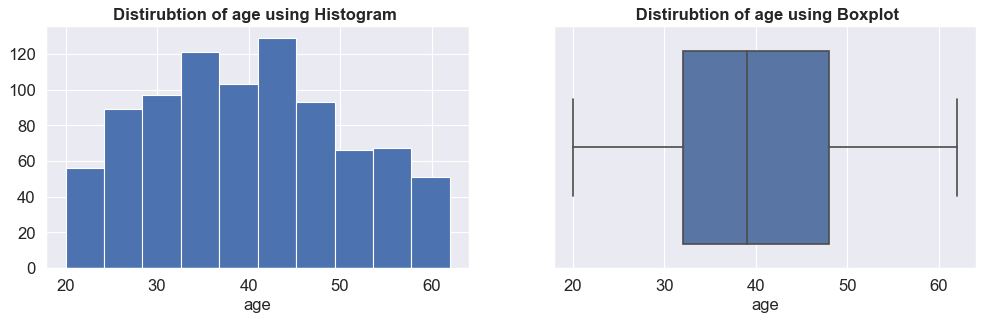

<Figure size 432x288 with 0 Axes>

In [151]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['age'])
plt.xlabel('age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distirubtion of age using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='age',data=df2)
plt.xlabel('age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title(' Distirubtion of age using Boxplot', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


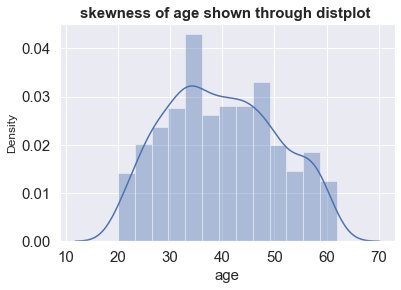

In [152]:
#distplot
sns.distplot(df2['age'])
plt.xlabel('age', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of age shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [153]:
print('Range of values: ', df2['educ'].max()-df2['educ'].min())
#Central values 
print('Minimum educ: ', df2['educ'].min())
print('Maximum Duration: ',df2['educ'].max())
print('Mean value: ', df2['educ'].mean())
print('Median value: ',df2['educ'].median())
print('Mode value: ',df2['educ'].mode())
print('Standard deviation: ', df2['educ'].std())
print('Null values: ',df2['educ'].isnull().any())
#Quartiles

Q1=df2['educ'].quantile(q=0.25)
Q3=df2['educ'].quantile(q=0.75)
print('educ - 1st Quartile (Q1) is: ', Q1)
print('educ- 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of education(years) is ', stats.iqr(df2['educ']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in education(years): ', L_outliers)
print('Upper outliers in education(years): ', U_outliers)

print('Number of outliers in educ upper : ', df2[df2['educ']>141.0]['educ'].count())
print('Number of outliers in educ lower : ', df2[df2['educ']<-67.0]['educ'].count())
print('% of Outlier in educ upper: ',round(df2[df2['educ']>141.0]['educ'].count()*100/len(df2)), '%')
print('% of Outlier in educ lower: ',round(df2[df2['educ']<-67.0]['educ'].count()*100/len(df2)), '%')

Range of values:  20
Minimum educ:  1
Maximum Duration:  21
Mean value:  9.307339449541285
Median value:  9.0
Mode value:  0    8
dtype: int64
Standard deviation:  3.0362586930870448
Null values:  False
educ - 1st Quartile (Q1) is:  8.0
educ- 3st Quartile (Q3) is:  12.0
Interquartile range (IQR) of education(years) is  4.0
Lower outliers in education(years):  2.0
Upper outliers in education(years):  18.0
Number of outliers in educ upper :  0
Number of outliers in educ lower :  0
% of Outlier in educ upper:  0 %
% of Outlier in educ lower:  0 %


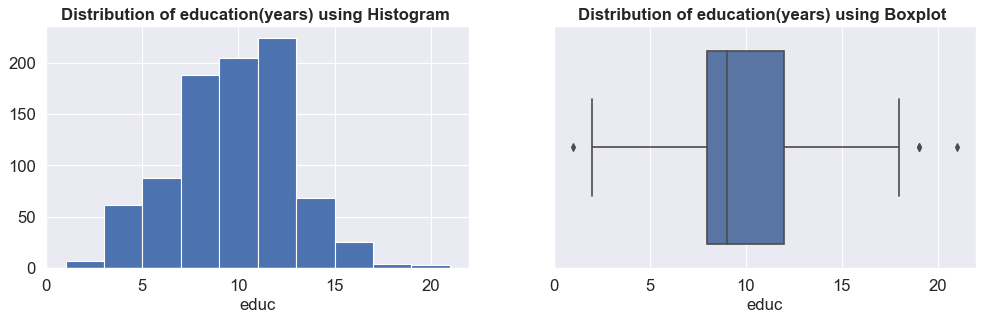

<Figure size 432x288 with 0 Axes>

In [154]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['educ'])
plt.xlabel('educ', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of education(years) using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='educ',data=df2)
plt.xlabel('educ', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of education(years) using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


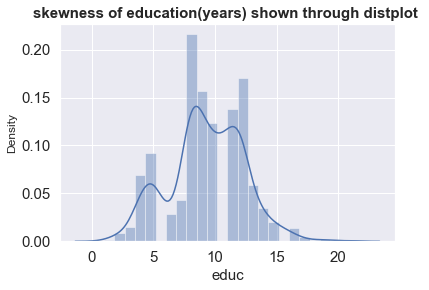

In [155]:
#distplot
sns.distplot(df2['educ'])
plt.xlabel('educ', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of education(years) shown through distplot ', fontsize=15,fontweight='bold')
plt.show()


In [156]:
print('Range of values: ', df2['no_young_children'].max()-df2['no_young_children'].min())
#Central values 
print('Minimum no_young_children: ', df2['no_young_children'].min())
print('Maximum no_young_children: ',df2['no_young_children'].max())
print('Mean value: ', df2['no_young_children'].mean())
print('Median value: ',df2['no_young_children'].median())
print('Mode value: ',df2['no_young_children'].mode())
print('Standard deviation: ', df2['no_young_children'].std())
print('Null values: ',df2['no_young_children'].isnull().any())
#Quartiles

Q1=df2['no_young_children'].quantile(q=0.25)
Q3=df2['no_young_children'].quantile(q=0.75)
print('no_young_children - 1st Quartile (Q1) is: ', Q1)
print('no_young_children - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of no_young_children is ', stats.iqr(df2['no_young_children']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in no_young_children: ', L_outliers)
print('Upper outliers in no_young_childrens: ', U_outliers)
print('Number of outliers in no_young_childrens upper : ', df2[df2['no_young_children']>142.5]['no_young_children'].count())
print('Number of outliers in no_young_children lower : ', df2[df2['no_young_children']<-53.5]['no_young_children'].count())
print('% of Outlier in Sales no_young_children: ',round(df2[df2['no_young_children']>142.5]['no_young_children'].count()*100/len(df2)), '%')
print('% of Outlier in Sales no_young_children: ',round(df2[df2['no_young_children']<-53.5]['no_young_children'].count()*100/len(df2)), '%')

Range of values:  3
Minimum no_young_children:  0
Maximum no_young_children:  3
Mean value:  0.3119266055045872
Median value:  0.0
Mode value:  0    0
dtype: int64
Standard deviation:  0.6128699714906449
Null values:  False
no_young_children - 1st Quartile (Q1) is:  0.0
no_young_children - 3st Quartile (Q3) is:  0.0
Interquartile range (IQR) of no_young_children is  0.0
Lower outliers in no_young_children:  0.0
Upper outliers in no_young_childrens:  0.0
Number of outliers in no_young_childrens upper :  0
Number of outliers in no_young_children lower :  0
% of Outlier in Sales no_young_children:  0 %
% of Outlier in Sales no_young_children:  0 %


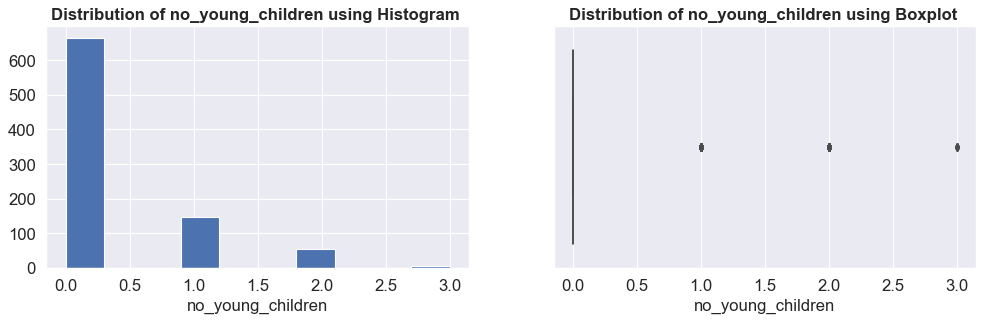

<Figure size 432x288 with 0 Axes>

In [157]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['no_young_children'])
plt.xlabel('no_young_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of no_young_children using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='no_young_children',data=df2)
plt.xlabel('no_young_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of no_young_children using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


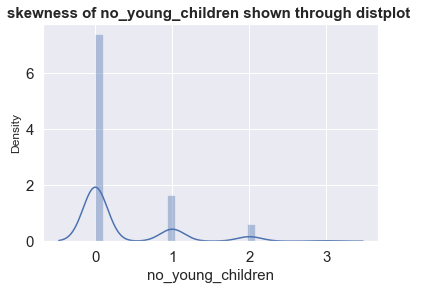

In [158]:
#distplot
sns.distplot(df2['no_young_children'])
plt.xlabel('no_young_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of no_young_children shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [159]:
print('Range of values: ', df2['no_older_children'].max()-df2['no_older_children'].min())
#Central values 
print('Minimum no_older_children: ', df2['no_older_children'].min())
print('Maximum no_older_children: ',df2['no_older_children'].max())
print('Mean value: ', df2['no_older_children'].mean())
print('Median value: ',df2['no_older_children'].median())
print('Mode value: ',df2['no_older_children'].mode())
print('Standard deviation: ', df2['no_older_children'].std())
print('Null values: ',df2['no_older_children'].isnull().any())
#Quartiles

Q1=df2['no_older_children'].quantile(q=0.25)
Q3=df2['no_older_children'].quantile(q=0.75)
print('no_older_children - 1st Quartile (Q1) is: ', Q1)
print('no_older_children - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of no_older_children is ', stats.iqr(df2['no_older_children']))
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in no_older_children: ', L_outliers)
print('Upper outliers in no_older_children: ', U_outliers)
print('Number of outliers in no_older_children upper : ', df2[df2['no_older_children']>142.5]['no_older_children'].count())
print('Number of outliers in no_older_childrenlower : ', df2[df2['no_older_children']<-53.5]['no_older_children'].count())
print('% of Outlier in  no_older_children: ',round(df2[df2['no_older_children']>142.5]['no_older_children'].count()*100/len(df2)), '%')
print('% of Outlier in  no_older_children: ',round(df2[df2['no_older_children']<-53.5]['no_older_children'].count()*100/len(df2)), '%')

Range of values:  6
Minimum no_older_children:  0
Maximum no_older_children:  6
Mean value:  0.9827981651376146
Median value:  1.0
Mode value:  0    0
dtype: int64
Standard deviation:  1.086786292705566
Null values:  False
no_older_children - 1st Quartile (Q1) is:  0.0
no_older_children - 3st Quartile (Q3) is:  2.0
Interquartile range (IQR) of no_older_children is  2.0
Lower outliers in no_older_children:  -3.0
Upper outliers in no_older_children:  5.0
Number of outliers in no_older_children upper :  0
Number of outliers in no_older_childrenlower :  0
% of Outlier in  no_older_children:  0 %
% of Outlier in  no_older_children:  0 %


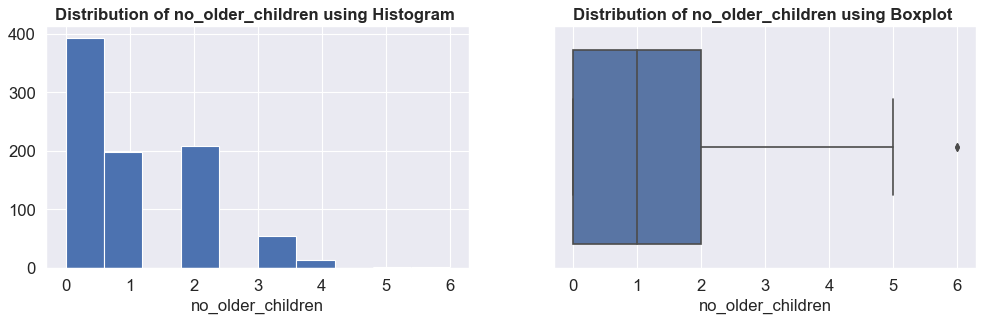

<Figure size 432x288 with 0 Axes>

In [160]:
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df2['no_older_children'])
plt.xlabel('no_older_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of no_older_children using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='no_older_children',data=df2)
plt.xlabel('no_older_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of no_older_children using Boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


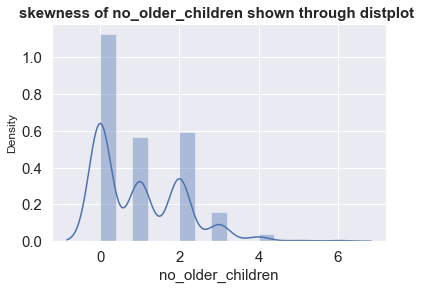

In [161]:
#distplot
sns.distplot(df2['no_older_children'])
plt.xlabel('no_older_children', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('skewness of no_older_children shown through distplot ', fontsize=15,fontweight='bold')
plt.show()

In [96]:
df2.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

<b><center>CATEGORICAL COLUMNS</center></b>

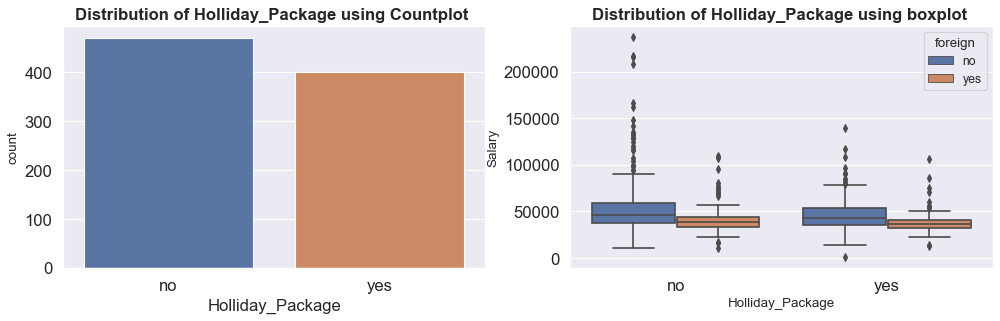

<Figure size 432x288 with 0 Axes>

In [175]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x = 'Holliday_Package')
plt.xlabel('Holliday_Package', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Holliday_Package using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Holliday_Package',y='Salary', hue='foreign',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Holliday_Package using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

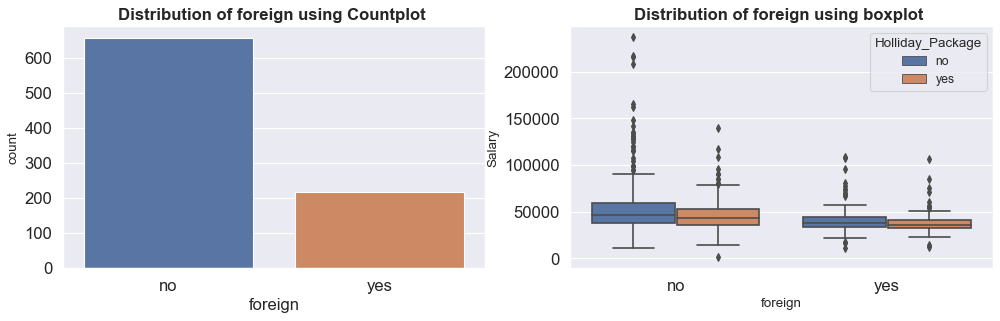

<Figure size 432x288 with 0 Axes>

In [176]:
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df2, x ='foreign')
plt.xlabel('foreign', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of foreign using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='foreign',y='Salary', hue='Holliday_Package',data=df2)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of foreign using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

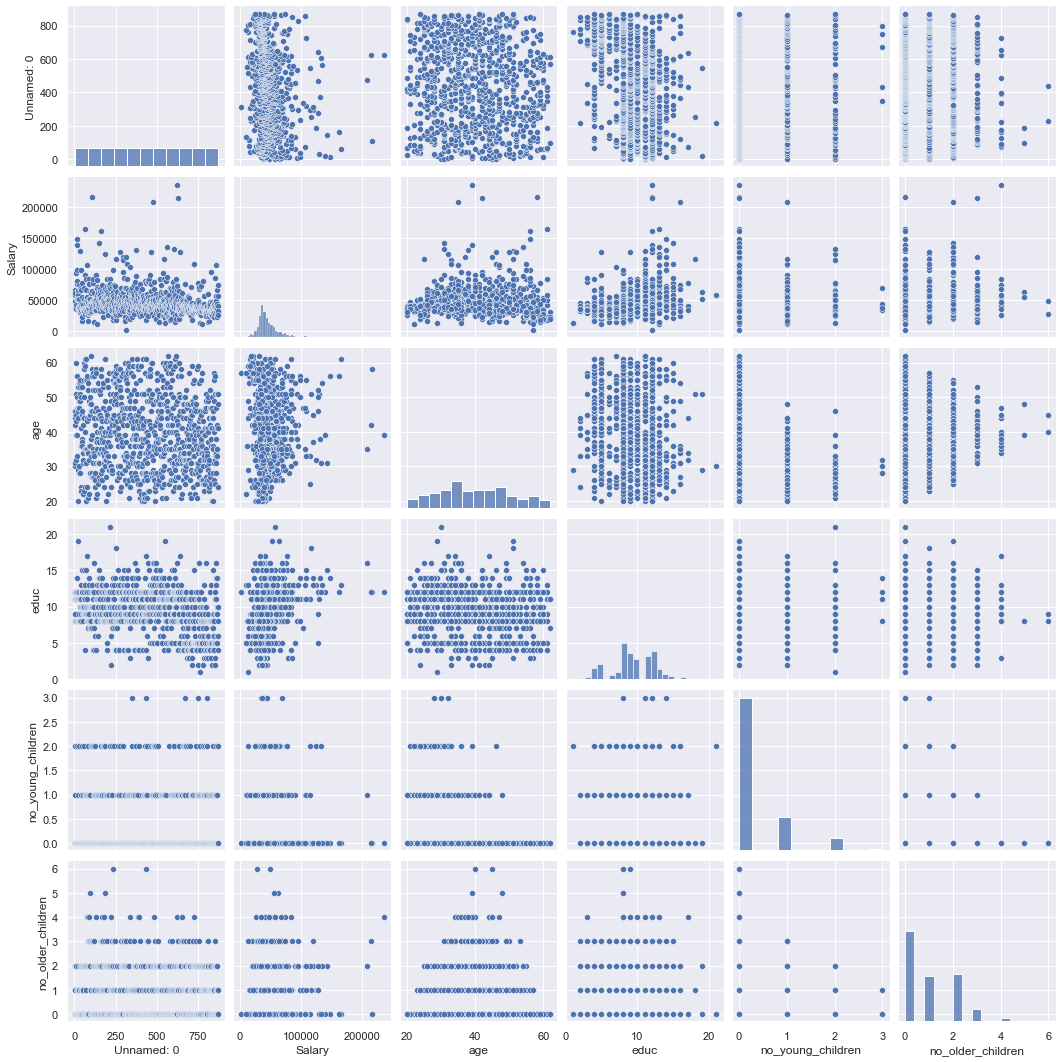

In [177]:
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'Mulitvariate Analysis using Heatmap. ')

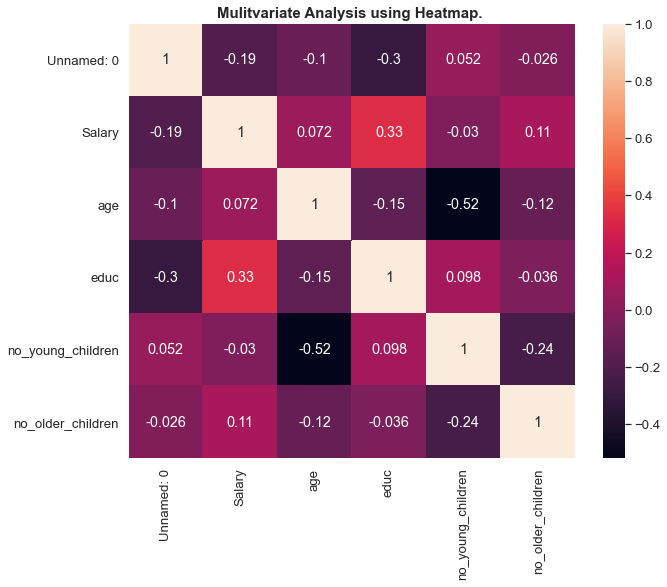

In [178]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2.corr(), annot=True)
plt.title('Mulitvariate Analysis using Heatmap. ', fontsize=15,fontweight='bold')


In [177]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         872 non-null    int64
 1   Holliday_Package   872 non-null    int8 
 2   Salary             872 non-null    int64
 3   age                872 non-null    int64
 4   educ               872 non-null    int64
 5   no_young_children  872 non-null    int64
 6   no_older_children  872 non-null    int64
 7   foreign            872 non-null    int8 
dtypes: int64(6), int8(2)
memory usage: 42.7 KB


In [179]:
# drop the serial no column as it is useless for the model
df2 = df2.drop('Unnamed: 0', axis=1)

In [180]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [181]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1
871,0,74659,51,10,0,0,1


In [182]:
#Encoding using one hot encoding
#pd.get_dummies(data=df2,drop_first=True)

In [183]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


<b>2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).</b>

In [184]:
#encoding using one hot encoding
#df2 = pd.get_dummies(df2, columns=['Holliday_Package','foreign'],drop_first=True)

In [185]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [186]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1
871,0,74659,51,10,0,0,1


In [151]:
# capture the target column ("Claimed") into separate vectors for training set and test set

X = df2.drop("Holliday_Package",axis=1)

y = df2.pop("Holliday_Package")

#now we have all the independant varibles in x and dependant variable in y

<b><center>LOGISTIC REGRESSION</center></b>

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [154]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [155]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [156]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [157]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [158]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


In [159]:
# Accuracy - Training Data
print("Accuracy score of the above created logistic regression model for train data is:",model.score(X_train, y_train))

Accuracy score of the above created logistic regression model for train data is: 0.6672131147540984


In [160]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.735


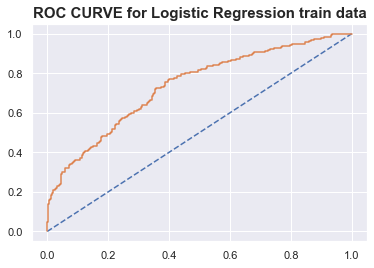

In [161]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title('ROC CURVE for Logistic Regression train data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

In [162]:
# Accuracy - Test Data
print("Accuracy score of the above created logistic regression model  is:",model.score(X_test, y_test))

Accuracy score of the above created logistic regression model  is: 0.6526717557251909


AUC: 0.735


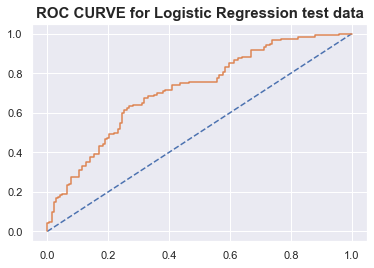

In [49]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title('ROC CURVE for Logistic Regression test data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

<b>CONFUSION MATRIX FOR TRAINING DATA</b>

In [50]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

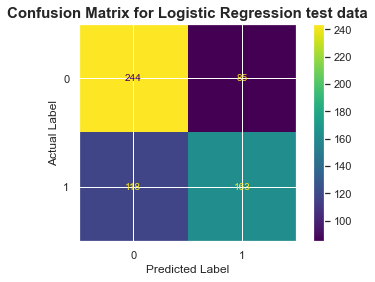

In [51]:
plot_confusion_matrix(model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression test data',fontsize=15,fontweight='bold')
plt.show()

#sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
#plt.xlabel('Predicted Label')
#plt.ylabel('Actual Label')
#plt.title('Confusion Matrix for Logistic Regression test data',fontsize=15,fontweight='bold')
#plt.show(

In [52]:
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



<b>CONFUSION MATRIX FOR TESTING DATA</b>

In [53]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

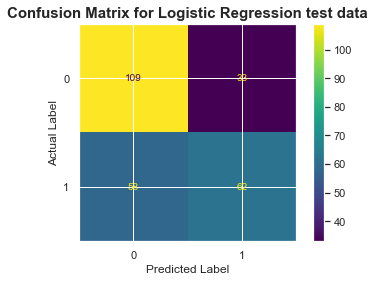

In [54]:
plot_confusion_matrix(model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression test data',fontsize=15,fontweight='bold')
plt.show()

In [55]:
print('Classification Report of the testing data:\n\n',classification_report(y_test, ytest_predict))

Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



<b>Using grid search CV</b>

In [67]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [68]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [72]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [73]:
best_model = grid_search.best_estimator_

In [74]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [75]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697042,0.302958
3,0.496348,0.503652
4,0.557723,0.442277


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



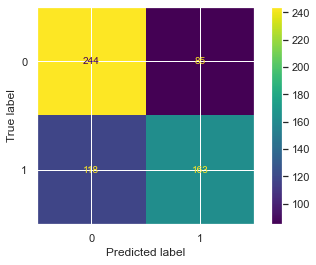

In [76]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict),'\n');

Classification Report of the testing data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



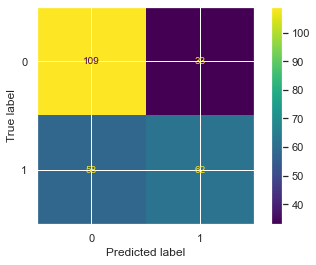

In [77]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print('Classification Report of the testing data:\n\n',classification_report(y_test, ytest_predict),'\n');

<b><center>LDA</center></b>

In [187]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= df2
Cor1 = data.corr()
Cor1

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,1.000000,-0.185694,-0.092311,-0.102552,-0.173115,0.080286,0.254096
Salary,-0.185694,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.201043
age,-0.092311,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,-0.102552,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.173115,-0.029664,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.080286,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,0.254096,-0.201043,-0.107148,-0.419678,0.085111,0.021317,1.000000


In [188]:
# Prepare training and test data and scale it
X = df2.drop("Holliday_Package",axis=1)
#X = scale(X)
Y = df2.pop("Holliday_Package")


In [189]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [190]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


<b>Building LDA model</b>

In [191]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [192]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
pred_class_train

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [193]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

<b>LDA Training data-performance metrics</b>

In [194]:
lda_train_acc = model.score(X_train,Y_train)
print("Accuracy of the LDA train data model:",lda_train_acc)

Accuracy of the LDA train data model: 0.6639344262295082


In [195]:
confusion_matrix(Y_train, pred_class_train)

array([[243,  86],
       [119, 162]], dtype=int64)

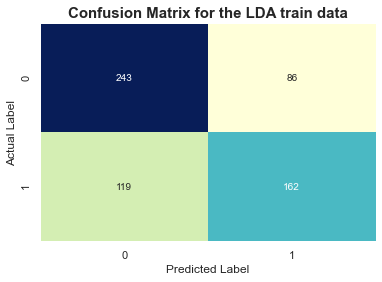

In [196]:
sns.heatmap(confusion_matrix(Y_train, pred_class_train),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for the LDA train data',fontsize=15,fontweight='bold')
plt.show()

In [197]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 



<b>LDA Testing data-performance metrics</b>

In [198]:
lda_test_acc = model.score(X_test,Y_test)
print("Accuracy of the LDA model:",lda_test_acc)

Accuracy of the LDA model: 0.6412213740458015


In [113]:
confusion_matrix(Y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

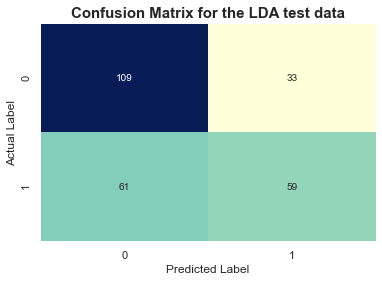

In [114]:
sns.heatmap(confusion_matrix(Y_test, pred_class_test),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for the LDA test data',fontsize=15,fontweight='bold')
plt.show()

In [115]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



<b>Probability prediction for the training and test data</b>

In [116]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [117]:
pred_prob_train

array([[0.2618488 , 0.7381512 ],
       [0.71038293, 0.28961707],
       [0.61765709, 0.38234291],
       ...,
       [0.45172715, 0.54827285],
       [0.26293277, 0.73706723],
       [0.52111433, 0.47888567]])

AUC for the Training Data: 0.733


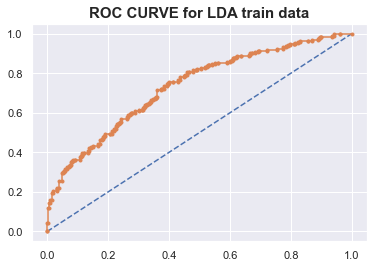

In [118]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.title('ROC CURVE for LDA train data',fontsize=15,fontweight='bold')
# show the plot
plt.show()

AUC for the Test Data: 0.714


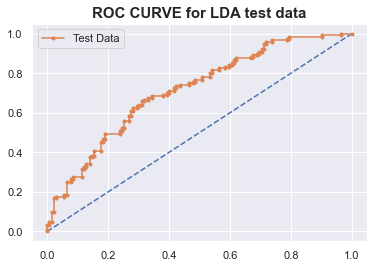

In [119]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.title('ROC CURVE for LDA test data',fontsize=15,fontweight='bold')
# show the plot
plt.legend(loc='best')
plt.show()

<b>Changing the cut-off values for maximum accuracy</b>

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


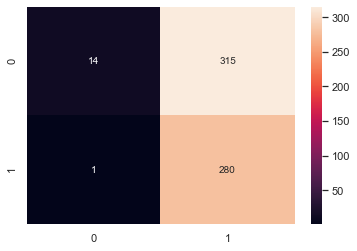

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


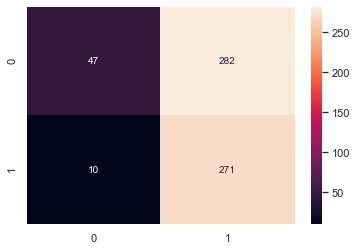

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


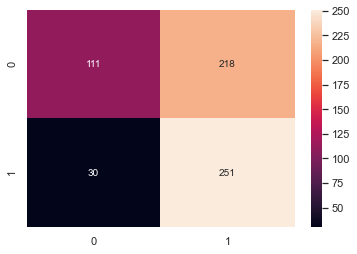

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


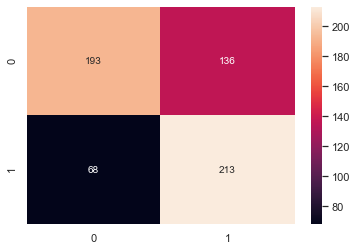

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


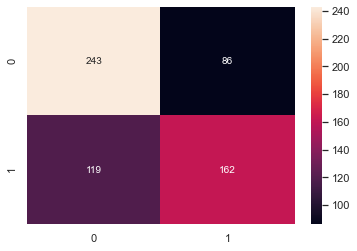

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


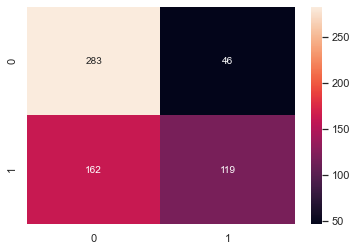

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


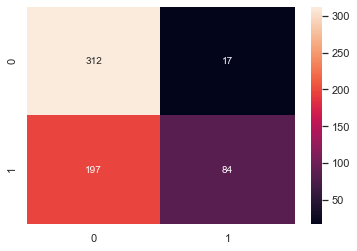

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


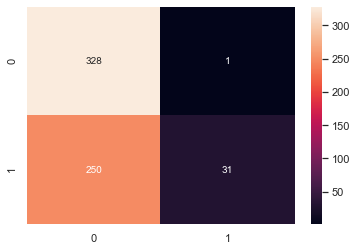

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


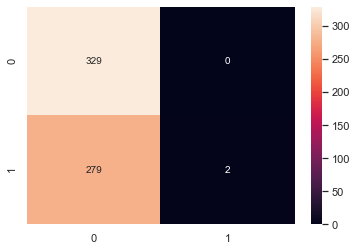

In [120]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that 0.5 and 0.6 gives better accuracy than the rest of the custom cut-off values. But 0.6 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.6 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [121]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.6:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

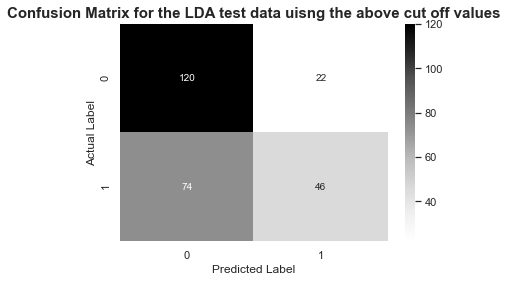

In [122]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for the LDA test data uisng the above cut off values',fontsize=15,fontweight='bold')
plt.show()

In [123]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.62      0.85      0.71       142
           1       0.68      0.38      0.49       120

    accuracy                           0.63       262
   macro avg       0.65      0.61      0.60       262
weighted avg       0.65      0.63      0.61       262
 



<b>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.</b>

<b><br>2.4 Inference: Basis on these predictions, what are the insights and recommendations.</br>
<br>Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.</br></b>